### Hypothesis Testing:
   - Hypothesis--->assumption.
   - estimate:
   - point estimate?

* process:
1. defined test statistics
2. form the hypothesis
3. calculate the value

### permutation test:
   - original=meu1-meu2
   X1-----
   X2-----
   - combine these two samples x1 and x2
   - randomly sampled
   - del1=s1------------>meu1
   - s2------------>meu2---->meu1-meu2

* sort all the x1=meu1-mue2

* x1,x2----------original------xn






## KS test:
   - X and Y are any two random variables
   - X=[x1,x2,x3,----xn]
   - Y=[y1,y2-------yn]
* task:
   - check the X and Y are having the same distribution or not.
   - X----m
   - Y----n
   - construct the CDF for both X and Y
   - CDF(X)-CDF(Y)=0----->both X and Y are having same distribution
   - m and n value large
   - CDF(X) and CDF(Y) are overlapping
   - value --->small X and Y---->if this case there may the possibility that null hypothesis is true
   - CDF(x)-cdf(y)--->x

##### P_value=P(x|h0)=0.05>--->accepted


* Therotical aspect
   - Dn,m---Test statistics
   - Dn,m=supx{F1,n(X)-F2,m(Y)}
   - H0-->X and Y are having same distribution
   - H1-->not having same distribution
   - alpha~p_value
   - condition for rejecting the null hypothesis

     * Dn,m>c(alpha)*sqrt((n+m)/n*m)

   - alpha=0.05
   - m=1000
   - n=1000
   - c(alpha)=1.358
   - Dn,m>0.047892--->Null hypothesis is rejected

   - Dn,m>any value----->false--->alternative hypothesis is accepted.

* process of applying the ks test:

    - check the SL is following Gaussian distribution or not
1. we need to standardize the data(normalizaed).

       PL-np.mean(SL)/(np.std(SL))
3. stats.kstest(normalized_values,'norm')

       test_sts,p_value=stats.kstest(normalized_values,'norm')

4. standardization=PL-mean(PL)/sd(PL)----Zscore

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df=pd.read_csv("C:\\Users\\magar\\OneDrive\\Desktop\\PROGRAMM\\Data Science\\Python\\iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
sepal=df["sepal.length"]
sepal

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [13]:
sepal_mean=np.mean(sepal)
sepal_mean

5.843333333333334

In [15]:
sepal_sd=np.std(sepal)
sepal_sd

0.8253012917851409

In [17]:
normalized_sepal=(sepal-sepal_mean)/sepal_sd
normalized_sepal

0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal.length, Length: 150, dtype: float64

In [21]:
 test_statistics,p_value=stats.kstest(normalized_sepal,'norm')
 test_statistics

0.08945440179507252

In [23]:
p_value

0.17058360931631134

In [14]:
petal=df["petal.length"]
petal

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

In [16]:
petal_mean=np.mean(petal)
petal_mean

3.7580000000000005

In [18]:
petal_sd=np.std(petal)
petal_sd

1.7594040657753032

In [20]:
normalized_petal=(petal-petal_mean)/petal_sd
normalized_petal

0     -1.340227
1     -1.340227
2     -1.397064
3     -1.283389
4     -1.340227
         ...   
145    0.819596
146    0.705921
147    0.819596
148    0.933271
149    0.762758
Name: petal.length, Length: 150, dtype: float64

In [22]:
 test_statistics,p_value=stats.kstest(normalized_petal,'norm')
 test_statistics

0.1989420083685971

In [24]:
p_value

1.1160726642843144e-05

In [26]:
value=1.1160726642843144e-05
print(f"{value}:.10f")

1.1160726642843144e-05:.10f


<Axes: xlabel='petal.length', ylabel='Count'>

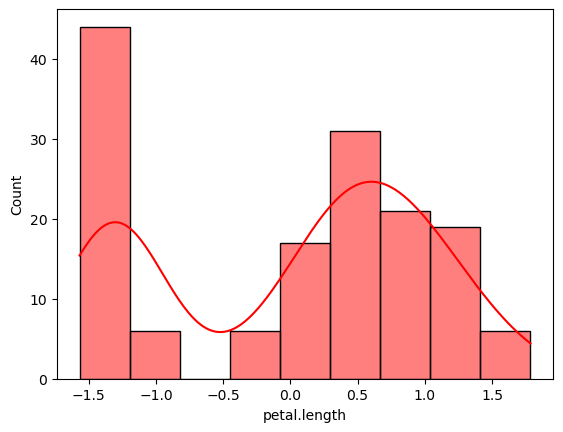

In [28]:
sns.histplot(normalized_petal,kde=True ,color='red')

<Axes: xlabel='sepal.length', ylabel='Count'>

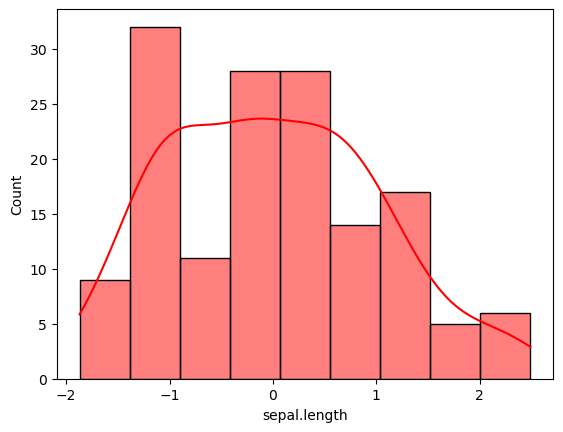

In [43]:
sns.histplot(normalized_sepal,kde=True ,color='red')

## Andersons Darling Test: (AD test)

   - This test is used to check a particular sample is having the same distribution or not
   - AD test primarily used to check other distribution is normal distribution or not.
   - we can use AD test to check other distributions also (weibull,uniform,exponetial etc)
   - we dont required any distribution parameters
   - In this testing we are comparing the Empiracal distribution function(EDF) with cumulative distribution function(CDF) of particular distribution.
     F(x)----->EDF
     Test statistics:
        EDF(x)-CDF(x)
     
##### EDF:empirical distribution function:
     EDF(x)=1/nsum(X<=x)

       X=[2,3,4,1,5]--sample data

       step1:sort x
         xsort=[1,2,3,4,5]

       step2:find the rank where X<=x
           F(X<=1)=1
           F(x<=2)=2
           F(x<=3)=3
           F(X<=4)=4
           F(X<=5)=5

       step3:
           F1=1/5
           F2=2/5
           F3=3/5
           F4=4/5
           F5=5/5
   
   - EDF will also give the non decreasing graph like a CDF.

##### Difference between EDF and CDF

   EDF                    
    - we don't required distribution parameter
    - we can directly apply method

   CDF:
    - we required a distribution parameter
    syntax:
      from scipy import stats
      norm.cdf(data,meu,SD)
    - we used CDF for normal distribution.

   *define the Hypothesis:
   
    H0:distribution are same
    H1:distribution are not same

    critical value:
      significance level:15%,10%,5%,2%,1%

    critical value:threshold value to reject the null hypothesis

     1.test statistics
     2.critical value
     3.significance level:15%,10%,5%,2%,1%

    criteria:
      test statistics>=critical_value-
      NUll hypothesis is rejected---->alternative hypothesis is accepted
     test statistics<critical value--->null hypothesis is accepted

! when we are apply AD test
- we are getting three kinds of value:
  
    syntax:
  
         from scipy import stats
         stats.anderson(data,dist='norm')


In [8]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [32]:
data=df["petal.length"]
data

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

In [16]:
from scipy import stats

In [40]:
result=stats.anderson(data,dist='norm')
result

AndersonResult(statistic=7.6785455198266845, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.7580000000000005, scale=1.7652982332594667)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [44]:
result.critical_values

array([0.562, 0.64 , 0.767, 0.895, 1.065])

In [46]:
#null hypothesis is rejected
result.statistic

7.6785455198266845

In [48]:
# KS test
normalised_data=(data-np.mean(data))//np.std(data)
normalised_data

0     -2.0
1     -2.0
2     -2.0
3     -2.0
4     -2.0
      ... 
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
Name: petal.length, Length: 150, dtype: float64

In [52]:
test_statistics,p_value=stats.kstest(normalised_data,'norm')
test_statistics

0.33333333333333337

In [54]:
p_value

2.329163174886984e-15

In [56]:
transform_data,alpha=stats.boxcox(data)
transform_data

array([0.39515539, 0.39515539, 0.29719483, 0.49263588, 0.39515539,
       0.68628897, 0.39515539, 0.49263588, 0.39515539, 0.49263588,
       0.49263588, 0.58967049, 0.39515539, 0.09966806, 0.19871456,
       0.49263588, 0.29719483, 0.39515539, 0.68628897, 0.49263588,
       0.68628897, 0.49263588, 0.        , 0.68628897, 0.87837911,
       0.58967049, 0.58967049, 0.49263588, 0.39515539, 0.58967049,
       0.58967049, 0.49263588, 0.49263588, 0.39515539, 0.49263588,
       0.19871456, 0.29719483, 0.39515539, 0.29719483, 0.49263588,
       0.29719483, 0.29719483, 0.29719483, 0.58967049, 0.87837911,
       0.39515539, 0.58967049, 0.39515539, 0.49263588, 0.39515539,
       3.46387186, 3.28378156, 3.64343615, 2.83108425, 3.37389397,
       3.28378156, 3.46387186, 2.19060004, 3.37389397, 2.74009188,
       2.3744711 , 3.01260446, 2.83108425, 3.46387186, 2.46613355,
       3.19353143, 3.28378156, 2.92192042, 3.28378156, 2.74009188,
       3.55371827, 2.83108425, 3.64343615, 3.46387186, 3.10314

In [58]:
alpha

0.9312837951447049

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

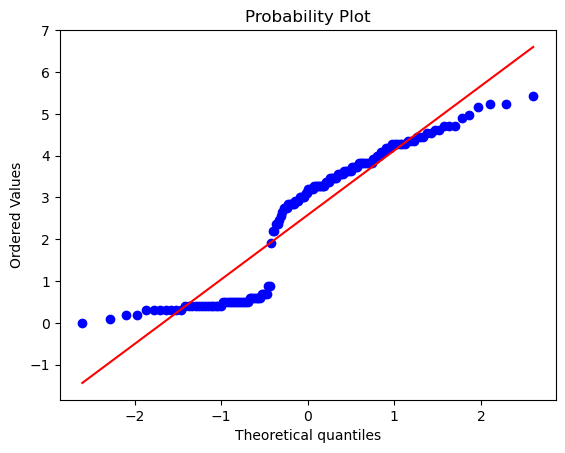

In [60]:
stats.probplot(transform_data,dist='norm',plot=plt)

## @ chi-square Test:

   - it is hypothesis test particular used for the catogirical variable.
   - we dont required any distribution parameters
   - categorical variable:normal or ordinal
       nominal data:dont have any order ---->gender
       ordinal data: we have order----->ex.days

 - * task:
   * to check the two categorical variable are having the relation or not
- terminologies:
1. chi-saquare value
2. observed data 
3. expected data
4. p_value
5. degree of freedom
* ex:
   - IS there any relationship between the Gender and movie type?
   - gender:Male/Female
   - movie type: horror  action  comedy  love stories

1. 
data--->sample=100
#####            horror     action    comedy  lovestories
 - male        10          15         10      15
- female       5           10         10      25

2.
hypothesis:
- H0:there is no relationship between these two columns
- H1:there is a relationship between these two columns
- observed data

                  horror     action    comedy  lovestories
 -      male         10          15         10      15-------->50
 -      female       5           10         10      25-------->50
 -      total        15          25         20      40-------->100

3.   Expected value=(row_value)*(Column_value)/100

                 horror         action    comedy   lS
         male    10*15/100      15*25/100

 


4. chi-squar=  summation(expected value-observed value)^2/E

       chi-square_value
   

6. degree of freedom

       dof= no of categorical variable-1
       dof=2-1=1

8. dof and significance level alpha=0.05

       7.879
9. chi-square>7.879---->H0 is accepted
  - chi-square<7.879----->H0 is rejected
                 

* titanic dataset:survived or not survived
   
* survived and Pclass--->


* titanic dataset:
* task:Is there any relationship between the survived and Pclass columns

In [12]:
import pandas as pd

In [66]:
df=pd.read_csv("C:\\Users\\magar\\OneDrive\\Desktop\\PROGRAMM\\Data Science\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df['Survived'].isnull().sum()

0

In [26]:
df['Pclass'].isnull().sum()

0

In [28]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [42]:
Survived0=[
    len(df[(df["Survived"]==1) & (df["Pclass"]==1)]),
    len(df[(df["Survived"]==1) & (df["Pclass"]==2)]),
    len(df[(df["Survived"]==1) & (df["Pclass"]==3)])
]


In [44]:
Survived1=[
    len(df[(df["Survived"]==1) & (df["Pclass"]==1)]),
    len(df[(df["Survived"]==1) & (df["Pclass"]==2)]),
    len(df[(df["Survived"]==1) & (df["Pclass"]==3)])
]


In [46]:
observed=np.array([Survived0,Survived1])
observed

array([[ 80,  97, 372],
       [136,  87, 119]])

In [4]:
from scipy.stats import chi2_contingency

In [52]:
# H0 is rejected 
chi,p_value,dof,expected=chi2_contingency(observed)
p_value

4.549251711298793e-23

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
df=pd.read_csv("C:\\Users\magar\\Downloads\\marketing_cva_f.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\magar\AppData\Local\Temp\ipykernel_1256\2943195835.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv("C:\\Users\magar\\Downloads\\marketing_cva_f.csv")


,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [10]:
df['avg_vehicle_age']

0       40.696695
1       48.755298
2       70.394474
3       53.460212
4       32.811507
          ...    
6812    37.492591
6813    48.946675
6814    65.310053
6815    48.002914
6816    45.151858
Name: avg_vehicle_age, Length: 6817, dtype: float64

In [12]:
df['avg_vehicle_age'].isnull().sum()

0

C:\Users\magar\AppData\Local\Temp\ipykernel_1256\300751294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_vehicle_age'],hist=True)


<Axes: xlabel='avg_vehicle_age', ylabel='Density'>

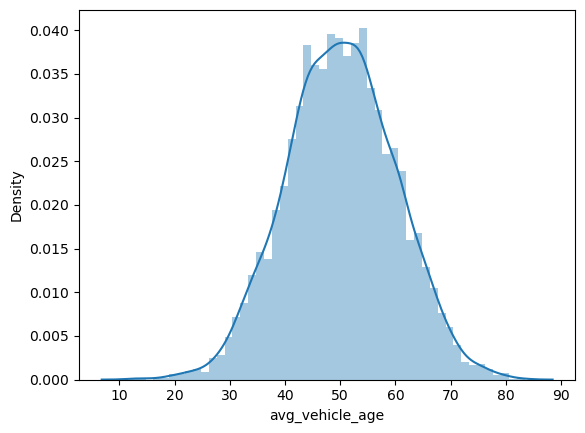

In [16]:
sns.distplot(df['avg_vehicle_age'],hist=True)

((array([-3.71482038, -3.48420977, -3.35734064, ...,  3.35734064,
          3.48420977,  3.71482038]),
  array([11.87597393, 12.97579736, 13.65700265, ..., 81.36779223,
         83.20637063, 83.38748475])),
 (9.922473086072275, 50.12625675651166, 0.9998408439831585))

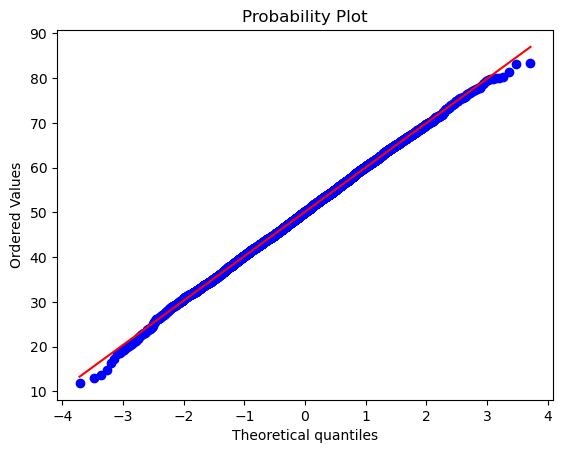

In [58]:
stats.probplot(df['avg_vehicle_age'],dist='norm',plot=plt)

In [60]:
transform_data,l=stats.boxcox(df['avg_vehicle_age'])
transform_data

array([44.44389775, 53.83105166, 79.32549155, ..., 73.30260475,
       52.95181483, 49.62516201])

In [62]:
l

1.0401662897663373

In [14]:
stats.anderson(df['avg_vehicle_age'],dist='norm')

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=50.12625675651166, scale=9.919766709600536)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [30]:
data=df['avg_vehicle_age']
data

0       40.696695
1       48.755298
2       70.394474
3       53.460212
4       32.811507
          ...    
6812    37.492591
6813    48.946675
6814    65.310053
6815    48.002914
6816    45.151858
Name: avg_vehicle_age, Length: 6817, dtype: float64

In [40]:
norm_data=(data-np.mean(data))//np.std(data)
norm_data

0      -1.0
1      -1.0
2       2.0
3       0.0
4      -2.0
       ... 
6812   -2.0
6813   -1.0
6814    1.0
6815   -1.0
6816   -1.0
Name: avg_vehicle_age, Length: 6817, dtype: float64

In [42]:
stats.kstest(norm_data,'norm')


KstestResult(statistic=0.34244493676826426, pvalue=0.0, statistic_location=-1.0, statistic_sign=1)

In [102]:
sample=np.random.choice(df['avg_vehicle_age'],size=1000,replace=True)
sample

array([57.00633324, 45.47377041, 57.08024239, 43.46764988, 43.53189337,
       67.53500316, 49.39796583, 53.79149081, 46.38829307, 31.72768764,
       63.1842778 , 42.28856907, 67.50304038, 54.65400471, 63.83902693,
       53.82428441, 62.49706945, 62.33108226, 45.92027269, 51.01031985,
       31.84878624, 65.3436056 , 38.69397002, 42.77874981, 37.2004843 ,
       32.16985252, 31.08076873, 54.42663729, 59.58197415, 52.72414141,
       49.79836542, 62.52735945, 47.2269739 , 60.48894218, 40.50186748,
       56.23982582, 50.59985941, 63.4958957 , 68.32061381, 66.03078877,
       43.65208284, 47.79521022, 37.68878064, 66.10535815, 40.88208908,
       53.51593022, 48.55148518, 69.77021004, 42.71740749, 53.3461977 ,
       67.81507877, 53.57756912, 45.67818867, 46.7388298 , 51.94935102,
       39.65090496, 41.4978321 , 50.5843133 , 50.39594762, 30.97090199,
       42.67519464, 50.81798575, 44.65755087, 51.6216606 , 37.9377975 ,
       56.54055716, 54.85803336, 55.31100717, 56.93846835, 41.72

In [ ]:
sample_mean=

In [8]:
dff=pd.read_csv("C:\\Users\\magar\\OneDrive\\Desktop\\PROGRAMM\\Data Science\\train.csv")
dff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
dff['Sex'].isnull().sum()

0

In [41]:
survived=[
    len(dff[(dff["Survived"]==0) & (dff["Sex"]=='male')]),
    len(dff[(dff["Survived"]==0) & (dff["Sex"]=='female')])
]
survived

[468, 81]

In [108]:
non_survived=[
    len(dff[(dff["Survived"]==1) & (dff["Sex"]=='male')]),
    len(dff[(dff["Survived"]==1) & (dff["Sex"]=='female')])
]

In [110]:
observed=np.array([survived,non_survived])
observed

array([[468,  81],
       [109, 233]])

In [112]:
from scipy.stats import chi2_contingency

In [114]:
chi,p_value,dof,expected=chi2_contingency(observed)
p_value

1.1973570627755645e-58

#### Q5.Did children (age < 16) have a better survival rate than adults (age ≥ 16)?

H₀: Survival rate of children = survival rate of adults

H₁: Survival rate of children > survival rate o

chi-square test

In [23]:
survived_child=[
    len(dff[(dff["Survived"]==0) & (dff["Age"]<=16)]),
    len(dff[(dff["Survived"]==1) & (dff["Age"]<=16)])
]
survived_child

[45, 55]

In [25]:
survived_adult=[
    len(dff[(dff["Survived"]==0) & (dff["Age"]>16)]),
    len(dff[(dff["Survived"]==1) & (dff["Age"]>16)])
]
survived_adult

[379, 235]

In [19]:
survived+non_survived

[45, 379, 55, 235]

In [27]:
x=len(dff[(dff["Survived"]==0) & (dff["Age"]<=16)])
x

45

In [31]:
y=len(dff[(dff["Survived"]==0) & (dff["Age"]>16)])
y

379

In [37]:
h1=(dff["Age"]<=16).sum()
h1

100

In [39]:
h2=(dff["Age"]>16).sum()
h2

614

In [49]:
observed=np.array([[x,h1],[y,h2]])
observed

array([[ 45, 100],
       [379, 614]], dtype=int64)

In [53]:
from statsmodels.stats.proportion import proportions_ztest